## Installation

In [5]:
pip install ntscraper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 245.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install textblob

IOStream.flush timed out
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 385.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 310.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 165.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.1/785.1 kB 200.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Scrape Tweets

In [1]:
import pandas as pd

In [7]:
from ntscraper import Nitter
scraper = Nitter()

Testing instances: 100%|██████████| 27/27 [01:17<00:00,  2.87s/it]


In [11]:
import pandas as pd

def palestine_get_tweets(query, search_mode, tweet_count):
    palestine_tweets = scraper.get_tweets(query, mode=search_mode, number=tweet_count)
    palestine_final_tweets = []

    for palestine_tweet in palestine_tweets['tweets']:
        palestine_data = [
            palestine_tweet['link'],
            palestine_tweet['text'],
            palestine_tweet['date'],
            palestine_tweet['stats']['likes'],
            palestine_tweet['stats']['comments']
        ]
        palestine_final_tweets.append(palestine_data)

    palestine_data_df = pd.DataFrame(palestine_final_tweets, columns=['link', 'text', 'date', 'No_of_likes', 'No_of_tweets'])
    return palestine_data_df

In [18]:
palestine_data = palestine_get_tweets('Palestine', 'hashtag', 1000)

19-Nov-23 10:01:08 - No instance specified, using random instance https://nitter.dafriser.be
19-Nov-23 10:01:15 - Current stats for Palestine: 15 tweets, 0 threads...
19-Nov-23 10:01:20 - Current stats for Palestine: 29 tweets, 0 threads...
19-Nov-23 10:01:24 - Current stats for Palestine: 40 tweets, 0 threads...
19-Nov-23 10:01:29 - Current stats for Palestine: 50 tweets, 0 threads...
19-Nov-23 10:01:34 - Current stats for Palestine: 66 tweets, 0 threads...
19-Nov-23 10:01:38 - Current stats for Palestine: 80 tweets, 0 threads...
19-Nov-23 10:01:43 - Current stats for Palestine: 91 tweets, 0 threads...
19-Nov-23 10:01:48 - Current stats for Palestine: 99 tweets, 0 threads...
19-Nov-23 10:01:53 - Current stats for Palestine: 107 tweets, 0 threads...
19-Nov-23 10:01:58 - Current stats for Palestine: 116 tweets, 0 threads...
19-Nov-23 10:02:02 - Current stats for Palestine: 126 tweets, 0 threads...
19-Nov-23 10:02:07 - Current stats for Palestine: 135 tweets, 0 threads...
19-Nov-23 10:02

## Spark

In [19]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PalestinTweetsSentimentAnalysis").getOrCreate()

In [20]:
spark_data = spark.createDataFrame(palestine_data)

In [21]:
spark_data.createOrReplaceTempView("tweets_table")

In [22]:
result = spark.sql("SELECT text, No_of_likes FROM tweets_table WHERE No_of_likes > 100")
result.show()

+--------------------+-----------+
|                text|No_of_likes|
+--------------------+-----------+
|Hamasın terör örg...|        223|
|Le #sionisme a pe...|       4063|
|Huge numbers marc...|       9334|
|A pitch invader w...|       1478|
|Biggest march I'v...|      12649|
|It was Palestine ...|       4431|
|عجيب😂👌  هذا الأ...|        418|
|Israeli soldiers ...|        670|
|Plan rapide résum...|        120|
|“Fight us, take o...|       1392|
|I didn't read abo...|       2740|
|Palestinian famil...|        286|
|I am shocked by t...|        272|
|So Congress is no...|       5379|
|Israeli forces wi...|        606|
|Gaza children boy...|        183|
|نیتن یاہو کو بغیر...|        324|
|The moment Israel...|        336|
|🇰🇼🇮🇱 Conflict...|       1617|
|Israeli army bull...|       3853|
+--------------------+-----------+
only showing top 20 rows



In [23]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

sentiment_udf = udf(get_sentiment, FloatType())

result_with_sentiment = result.withColumn("sentiment", sentiment_udf("text"))


In [24]:
result_with_sentiment.show()

+--------------------+-----------+----------+
|                text|No_of_likes| sentiment|
+--------------------+-----------+----------+
|Hamasın terör örg...|        223|       0.0|
|Le #sionisme a pe...|       4063|       0.0|
|Huge numbers marc...|       9334|   0.28125|
|A pitch invader w...|       1478|       0.0|
|Biggest march I'v...|      12649|       0.0|
|It was Palestine ...|       4431|       0.0|
|عجيب😂👌  هذا الأ...|        418|       0.0|
|Israeli soldiers ...|        670|   -0.3875|
|Plan rapide résum...|        120|       0.0|
|“Fight us, take o...|       1392|0.43333334|
|I didn't read abo...|       2740|    0.9375|
|Palestinian famil...|        286|   -0.2125|
|I am shocked by t...|        272|       0.1|
|So Congress is no...|       5379|   -0.0375|
|Israeli forces wi...|        606|       0.0|
|Gaza children boy...|        183|       0.0|
|نیتن یاہو کو بغیر...|        324|       0.0|
|The moment Israel...|        336|       0.0|
|🇰🇼🇮🇱 Conflict...|       1617|      

In [25]:
average_sentiment = result_with_sentiment.agg({"sentiment": "avg"}).collect()[0][0]
print("Average Sentiment:", average_sentiment)

Average Sentiment: 0.023350524108336254


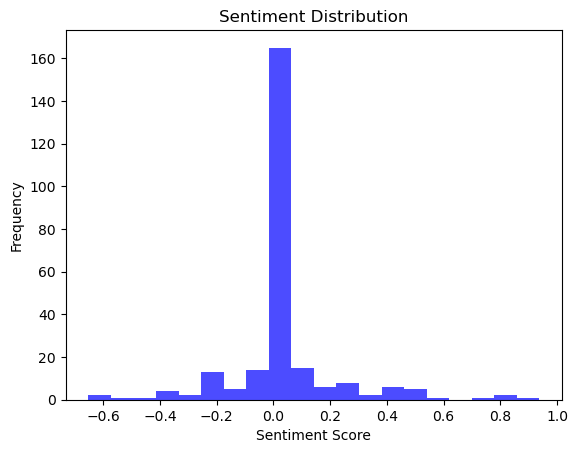

In [26]:
import matplotlib.pyplot as plt

sentiment_distribution = result_with_sentiment.select("sentiment").toPandas()

plt.hist(sentiment_distribution["sentiment"], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [27]:
def map_sentiment_to_category(sentiment_score):
    if sentiment_score > 0.2:
        return "Happy"
    elif sentiment_score < -0.2:
        return "Sad"
    else:
        return "Neutral"

from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

category_udf = udf(map_sentiment_to_category, StringType())

result_with_sentiment = result_with_sentiment.withColumn("sentiment_category", category_udf("sentiment"))

result_with_sentiment.select("text", "sentiment", "sentiment_category").show(truncate=False)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+
|text                                                                                                                                                                                                                                                                                                                                                                                                        

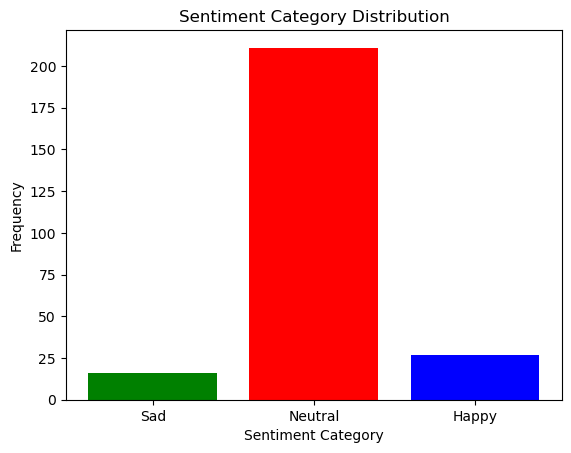

In [28]:
import matplotlib.pyplot as plt

sentiment_category_distribution = result_with_sentiment.groupBy("sentiment_category").count().toPandas()

plt.bar(sentiment_category_distribution["sentiment_category"], sentiment_category_distribution["count"], color=['green', 'red', 'blue'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()


In [31]:
pip install WordCloud

IOStream.flush timed out
Note: you may need to restart the kernel to use updated packages.


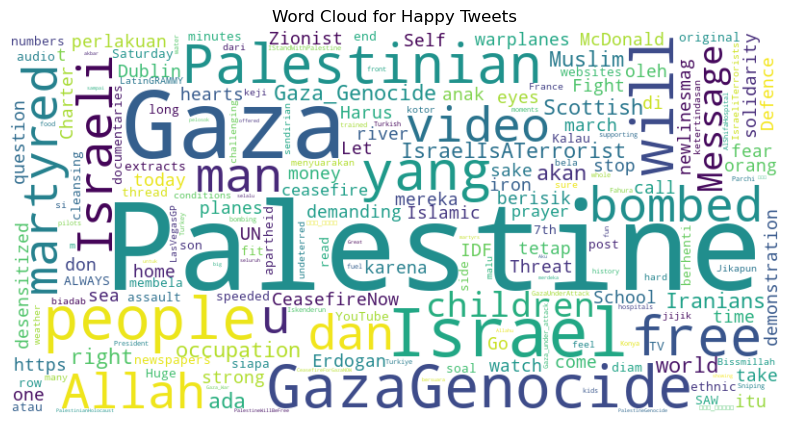

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = " ".join(result_with_sentiment.filter("sentiment_category == 'Happy'").select("text").rdd.flatMap(lambda x: x).collect())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Happy Tweets')
plt.show()


In [41]:
csv_file_path = 'palestine_tweets_spark.csv'
spark_data.write.csv(csv_file_path, header=True, mode='overwrite')

In [46]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer, StringIndexer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import functions as F

spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

csv_file_path = 'palestine_tweets_spark.csv'
labeled_data_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

print("Columns in the DataFrame:", labeled_data_spark.columns)

threshold = 100  
labeled_data_spark = labeled_data_spark.withColumn(
    "label",
    F.when((labeled_data_spark["No_of_likes"] > threshold), "positive")
    .when((labeled_data_spark["No_of_likes"] < threshold), "negative")
    .otherwise("neutral")
)

indexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

indexed_label_col = "indexedLabel"
while indexed_label_col in labeled_data_spark.columns:
    indexed_label_col += "_new"

labeled_data_spark = indexer.fit(labeled_data_spark).transform(labeled_data_spark).withColumnRenamed("indexedLabel", indexed_label_col)

(training_data, testing_data) = labeled_data_spark.randomSplit([0.8, 0.2], seed=42)

tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashing_tf = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="features")
nb = NaiveBayes(featuresCol=hashing_tf.getOutputCol(), labelCol=indexed_label_col, smoothing=1.0, modelType="multinomial")

pipeline = Pipeline(stages=[tokenizer, hashing_tf, nb])

model = pipeline.fit(training_data)

predictions = model.transform(testing_data)

evaluator = MulticlassClassificationEvaluator(labelCol=indexed_label_col, predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2%}".format(accuracy))


Columns in the DataFrame: ['link', 'text', 'date', 'No_of_likes', 'No_of_tweets']
Accuracy: 67.68%


In [49]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = ParamGridBuilder() \
    .addGrid(nb.smoothing, [0.5, 1.0, 1.5]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5) 

model_cv = crossval.fit(training_data)

predictions_cv = model_cv.transform(testing_data)

accuracy_cv = evaluator.evaluate(predictions_cv)
print("Cross-Validated Accuracy: {:.2%}".format(accuracy_cv))


19-Nov-23 15:14:42 - Closing down clientserver connection
19-Nov-23 15:14:42 - Closing down clientserver connection
Cross-Validated Accuracy: 67.68%


In [50]:
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer

regex_tokenizer = RegexTokenizer(inputCol="text", outputCol="tokens", pattern="\\W")
remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")

pipeline = Pipeline(stages=[tokenizer, regex_tokenizer, remover, hashing_tf, nb])

model_updated = pipeline.fit(training_data)

predictions_updated = model_updated.transform(testing_data)

accuracy_updated = evaluator.evaluate(predictions_updated)
print("Updated Model Accuracy: {:.2%}".format(accuracy_updated))


Updated Model Accuracy: 67.68%


In [51]:
model_save_path = "Palestinemodel"
model.save(model_save_path)

In [53]:
pip install streamlit

IOStream.flush timed out
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 344.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 194.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 88.6 kB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 176.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 162.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
import streamlit as st
import pandas as pd
from pyspark.ml import PipelineModel

model_path = "Palestinemodel"
saved_model = PipelineModel.load(model_path)

st.title("Twitter Sentiment Analysis")

tweet_text = st.text_area("Enter a tweet:", "")

if st.button("Predict"):
    input_data = pd.DataFrame({"text": [tweet_text]})
    input_spark = spark.createDataFrame(input_data)

    prediction = saved_model.transform(input_spark)

    st.write("Predicted Sentiment:", prediction.select("prediction").collect()[0]["prediction"])


2023-11-19 15:20:37.981 
  command:

    streamlit run /opt/conda/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run palestina.py